In [207]:
import pandas as pd

In [208]:
df = pd.read_csv('data/data_fakenews_classifier/fake-news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [209]:
X = df.drop('label', axis = 1)
y = df['label']
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [210]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [211]:
df.shape

(20800, 5)

In [212]:
df = df.dropna()

In [213]:
df.shape

(18285, 5)

In [214]:
messages = df.copy()

In [215]:
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [216]:
messages.reset_index(drop=True,inplace=True)

In [217]:
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [218]:
messages['title'][3]

'15 Civilians Killed In Single US Airstrike Have Been Identified'

In [219]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()

corpus = []

for row in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][row])
    review = review.lower()
    review = review.split()

    review = [stemmer.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [220]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

## Bag of Words

In [221]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [222]:
X.shape

(18285, 5000)

In [223]:
y = messages['label']

In [224]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state=0)

In [225]:
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [226]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [227]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [228]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [229]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [230]:
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion Matrix',cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest', cmap = cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization')

    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment="center", color = "white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

#### MultinomialNB Algorithm

In [231]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [232]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import itertools

Accuracy :  0.902
Confusion Matrix, without normalization


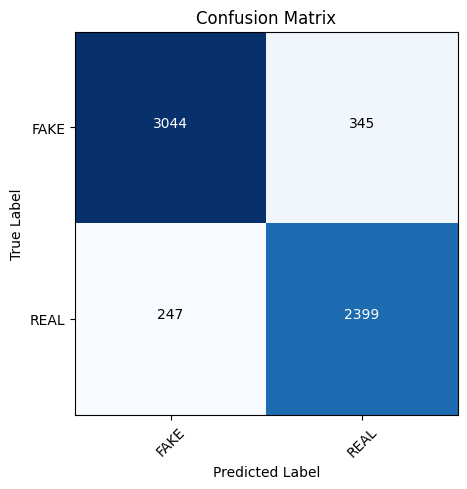

In [233]:
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy :  %0.3f" %score)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes = ['FAKE','REAL'])

#### Passive Aggresive Classifier Algorithm

In [234]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

Accuracy :  0.920
Confusion Matrix, without normalization


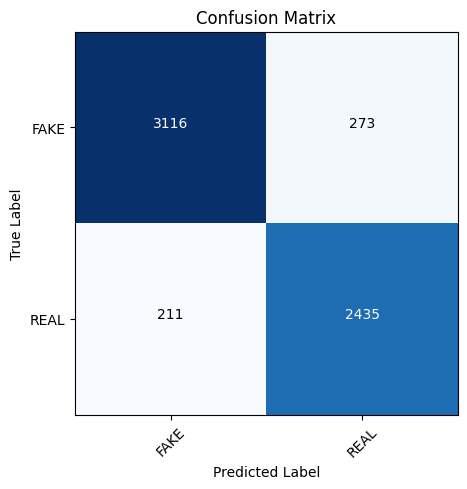

In [235]:
linear_clf.fit(X_train,y_train)
y_pred = linear_clf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy :  %0.3f" %score)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes = ['FAKE','REAL'])

#### MultinomialNB Algorithm with Hyperparameter

In [236]:
classifier = MultinomialNB(alpha=0.1)

In [237]:
previous_score =0
for alpha in np.arange(0,1,0.1):
    sub_classifer = MultinomialNB(alpha=alpha)
    sub_classifer.fit(X_train,y_train)
    y_pred = sub_classifer.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    if score > previous_score:
        classifier = sub_classifer
    print('Alpha: {}, Score: {}'.format(alpha,score))

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score: 0.8903065451532726
Alpha: 0.1, Score: 0.9020712510356255
Alpha: 0.2, Score: 0.9025683512841757
Alpha: 0.30000000000000004, Score: 0.9024026512013256
Alpha: 0.4, Score: 0.9017398508699255
Alpha: 0.5, Score: 0.9015741507870754
Alpha: 0.6000000000000001, Score: 0.9022369511184756
Alpha: 0.7000000000000001, Score: 0.9025683512841757
Alpha: 0.8, Score: 0.9015741507870754
Alpha: 0.9, Score: 0.9017398508699255


In [238]:
feature_names = cv.get_feature_names_out()

In [239]:
classifier.feature_log_prob_[0]

array([ -9.06056227,  -9.06056227, -10.28838629, ...,  -9.99212048,
       -11.45845755,  -9.42157562])

In [240]:
## Most Real
sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse=True)[:20]

[(-2.9468577463990755, 'new'),
 (-2.994219848520549, 'time'),
 (-3.000566240637532, 'york'),
 (-3.0008020674474167, 'new york'),
 (-3.014815217142134, 'york time'),
 (-3.014815217142134, 'new york time'),
 (-3.9648310157438633, 'breitbart'),
 (-4.004573851696944, 'trump'),
 (-5.2756841712452855, 'donald'),
 (-5.282590276041697, 'donald trump'),
 (-5.755045510465673, 'say'),
 (-5.992274458590198, 'obama'),
 (-6.016039835625665, 'clinton'),
 (-6.106599412671392, 'presid'),
 (-6.122523316028115, 'state'),
 (-6.177512429323892, 'report'),
 (-6.188882648465076, 'attack'),
 (-6.253840544739848, 'hous'),
 (-6.259960514881633, 'brief'),
 (-6.316793989644799, 'hillari')]

In [241]:
## Most Fake
sorted(zip(classifier.feature_log_prob_[0], feature_names))[:20]

[(-11.458457546147459, 'access pipelin protest'),
 (-11.458457546147459, 'acknowledg emf'),
 (-11.458457546147459, 'acknowledg emf damag'),
 (-11.458457546147459, 'acquit'),
 (-11.458457546147459, 'acr'),
 (-11.458457546147459, 'adhd'),
 (-11.458457546147459, 'airstrik kill'),
 (-11.458457546147459, 'al nusra'),
 (-11.458457546147459, 'america last'),
 (-11.458457546147459, 'america vote'),
 (-11.458457546147459, 'american concern'),
 (-11.458457546147459, 'american concern elect'),
 (-11.458457546147459, 'american peopl defeat'),
 (-11.458457546147459, 'aqsa'),
 (-11.458457546147459, 'arabian'),
 (-11.458457546147459, 'ariel noyola'),
 (-11.458457546147459, 'ariel noyola rodr'),
 (-11.458457546147459, 'ask question'),
 (-11.458457546147459, 'auf'),
 (-11.458457546147459, 'avail')]

## TF-IDF

In [242]:
## we will use text instead of title (we used title in the BOW)
df = pd.read_csv('data/data_fakenews_classifier/fake-news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [243]:
df.shape

(20800, 5)

In [244]:
df.dropna(inplace=True)
df.shape

(18285, 5)

In [245]:
messages = df.copy()
messages.reset_index(drop = True, inplace=True)
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [247]:
messages['text'][3]

'Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilians are being killed by American airstrikes in Afghanistan is now higher than it was in 2014 when the US was engaged in active combat operations.   Photo of Hellfire missiles being loaded onto a US military Reaper drone in Afghanistan by Staff Sgt. Brian Ferguson/U.S. Air Force. \nThe Bureau has been able to identify 15 civilians killed in a single US drone strike in Afghanistan last month – the biggest loss of civilian life in one strike since the attack on the Medecins Sans Frontieres hospital (MSF) last October. \nThe US claimed it had conducted a “counter-terrorism” strike against Islamic State (IS) fighters when it hit Nangarhar province with missiles on September 28. But the next day the United Nations issued an unusually rapid and strong statement saying the strike had killed 15 civilians and injured 13 others who had gathered at a house to celebrate a tribal elder’s return from a pil

In [248]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()

corpus = []

for rows in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][row])
    review = review.lower()
    review = review.split()

    review = [stemmer.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [249]:
corpus[3]

'david swanson author activist journalist radio host nobel peac prize nomine director worldbeyondwar com campaign coordin rootsact org host talk nation radio talk nation radio vt radio syndic pacifica network show also air wtju charlottesvil va wcsx detroit mi kghi westport wa whu storr ct wprr grand rapid mi krfp lp moscow id kzgm cabool mo kmud garbervil ca wazu peoria il wxrd crown point geneva radio geneva ny kkrn round mountain ca kskq lp ashland wuow lp oneonta ny lie radio pinol ca wyap lp clay wv detour johnson citi tn wzrd chicago il weft champaign il wxpi pittsburgh pa wdrt viroqua wi verac onlin liberti justic radio shirley ithaca commun radio ithaca ny wmcb greenfield prx org kao fm olympia wa wusb fm stoni brook ny wool fm bellow fall vermont wslr lp sarasota florida also blog davidswanson org warisacrim org prolif author latest book war lie daybreak undo imperi presid form perfect union world outlaw war swanson hold master degre philosophi univers virginia work newspap re

In [250]:
## TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = tfidf.fit_transform(corpus).toarray()

In [251]:
X.shape

(18285, 1711)

In [252]:
y = messages['label']

In [194]:
tfidf.get_feature_names_out()

array(['abil', 'abil kill', 'abil kill ton', ..., 'year money taken',
       'year starvat', 'year starvat earth'], dtype=object)

In [195]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [275]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [276]:
count_df = pd.DataFrame(X_train, columns = tfidf.get_feature_names_out())

In [277]:
count_df.head()

,abil,abil kill,abil kill ton,abl,abl design,abl design amazingli,academ,academ perform,academ perform us,acorn,...,wzrd chicago il,year,year commun,year commun coordin,year first,year first foremost,year money,year money taken,year starvat,year starvat earth
0,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,...,0.017408,0.069631,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408
1,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,...,0.017408,0.069631,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408
2,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,...,0.017408,0.069631,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408
3,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,...,0.017408,0.069631,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408
4,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,...,0.017408,0.069631,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408,0.017408


In [278]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [279]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import itertools

Accuracy :  0.562
Confusion Matrix, without normalization


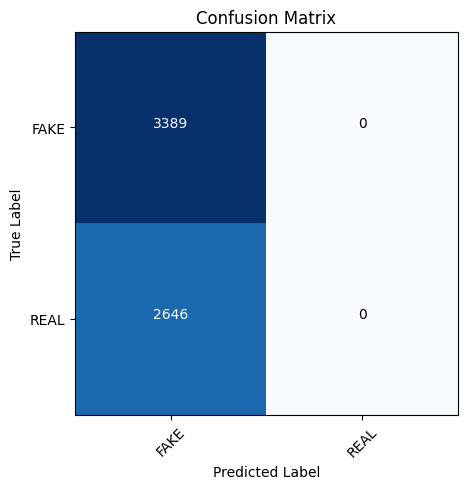

In [280]:
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy :  %0.3f" %score)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes = ['FAKE','REAL'])

#### Passive Aggresive Classifier Algorithm

In [281]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

Accuracy :  0.562
Confusion Matrix, without normalization


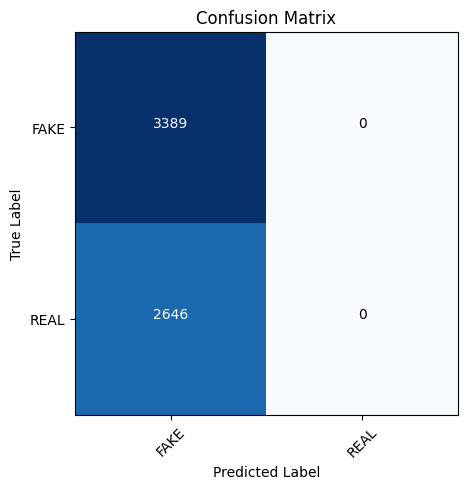

In [282]:
linear_clf.fit(X_train,y_train)
y_pred = linear_clf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy :  %0.3f" %score)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes = ['FAKE','REAL'])

#### MultinomialNB Algorithm with Hyperparameter

In [283]:
classifier = MultinomialNB(alpha=0.1)

In [284]:
previous_score =0
for alpha in np.arange(0,1,0.1):
    sub_classifer = MultinomialNB(alpha=alpha)
    sub_classifer.fit(X_train,y_train)
    y_pred = sub_classifer.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    if score > previous_score:
        classifier = sub_classifer
    print('Alpha: {}, Score: {}'.format(alpha,score))

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score: 0.5615575807787904
Alpha: 0.1, Score: 0.5615575807787904
Alpha: 0.2, Score: 0.5615575807787904
Alpha: 0.30000000000000004, Score: 0.5615575807787904
Alpha: 0.4, Score: 0.5615575807787904
Alpha: 0.5, Score: 0.5615575807787904
Alpha: 0.6000000000000001, Score: 0.5615575807787904
Alpha: 0.7000000000000001, Score: 0.5615575807787904
Alpha: 0.8, Score: 0.5615575807787904
Alpha: 0.9, Score: 0.5615575807787904


In [285]:
feature_names = cv.get_feature_names_out()

In [286]:
classifier.feature_log_prob_[0]

array([-7.60182366, -7.60182366, -7.60182366, ..., -7.60182366,
       -7.60182366, -7.60182366])

In [287]:
## Most Real
sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse=True)[:20]

[(-4.900667377964116, 'debbi'),
 (-5.305885454447748, 'event breitbart'),
 (-5.305885454447748, 'dr duke'),
 (-5.528843772082725, 'feder reserv'),
 (-5.8162171979632005, 'enough'),
 (-5.8162171979632005, 'depict'),
 (-5.8162171979632005, 'crime'),
 (-5.8162171979632005, 'admin'),
 (-5.998291906070921, 'fli'),
 (-5.998291906070921, 'demonstr'),
 (-5.998291906070921, 'curb'),
 (-5.998291906070921, 'craze'),
 (-5.998291906070921, 'confront'),
 (-5.998291906070921, 'beach'),
 (-5.998291906070921, 'bbc'),
 (-5.998291906070921, 'attorney'),
 (-5.998291906070921, 'alabama'),
 (-6.22106529856995, 'four'),
 (-6.22106529856995, 'father'),
 (-6.22106529856995, 'effect')]

In [288]:
## Most Fake
sorted(zip(classifier.feature_log_prob_[0], feature_names))[:20]

[(-7.601823656946605, 'abandon'),
 (-7.601823656946605, 'abc'),
 (-7.601823656946605, 'abc news'),
 (-7.601823656946605, 'abduct'),
 (-7.601823656946605, 'abe'),
 (-7.601823656946605, 'abedin'),
 (-7.601823656946605, 'abl'),
 (-7.601823656946605, 'abort'),
 (-7.601823656946605, 'abroad'),
 (-7.601823656946605, 'absolut'),
 (-7.601823656946605, 'abstain'),
 (-7.601823656946605, 'absurd'),
 (-7.601823656946605, 'abus'),
 (-7.601823656946605, 'abus new'),
 (-7.601823656946605, 'abus new york'),
 (-7.601823656946605, 'access pipelin'),
 (-7.601823656946605, 'access pipelin protest'),
 (-7.601823656946605, 'accid'),
 (-7.601823656946605, 'accord'),
 (-7.601823656946605, 'account')]